In [24]:
# Bibliotecas que foramutilizadas para realizar a atividade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

import IPython

import os

print(os.getcwd())
print(os.listdir())

def cm_to_inch(value):
    return value/2.54

/home/andre/Documents/Git/STD_DCA0107/U2/Lista_05
['lista_05.ipynb', 'Lista_de_exercicios_Modulacao_e_Demodulac807a771o.pdf']


# Funções Auxiliares

In [25]:
# Função para plotar espectro (similar ao plotspec do MATLAB)
def plotspec(signal, Ts, title=""):
    N = len(signal)
    ssf = np.fft.fftshift(np.fft.fftfreq(N, Ts))  # Vetor de frequência
    fx = np.fft.fftshift(np.fft.fft(signal))  # FFT do sinal
    plt.figure()
    plt.plot(ssf, np.abs(fx))
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# 01

A partir do código em *filternoise.m* crie um filtro que: (a) passe todas as frequências acima
de $500 Hz$, (b) passe todas as frequências abaixo de $3 kHz$, (c) rejeite todas as frequências
entre $1.5 kHz$ e $2.5 kHz$, (d) reprojete os três filtros anteriores considerando que a frequência
de amostragem foi alterada para $Fs = 20 kHz$.

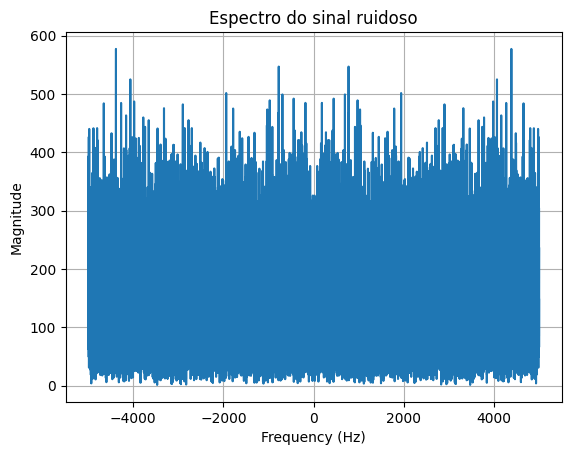

In [26]:
# Parâmetros
time = 3  # Duração do sinal
Ts = 1 / 10000  # Intervalo de amostragem
Fs = 1 / Ts # Frequencia de amostragem (Hz)
N = int(time / Ts)  # Número de amostras
sinal_ruidoso = np.random.randn(N)  # Gera o sinal de ruído branco

plotspec(sinal_ruidoso, Ts, "Espectro do sinal ruidoso")

## a

passe todas as frequências acima
de $500 Hz$

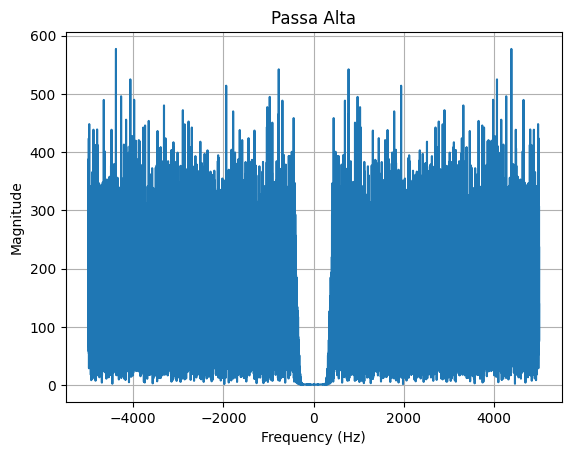

In [27]:
cutoff = 500.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_hb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [0, 1], fs=Fs)

sinal_filtrado_hb = signal.lfilter(taps_hb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_hb, Ts, "Passa Alta")

## b

 passe todas as frequências abaixo de $3 kHz$

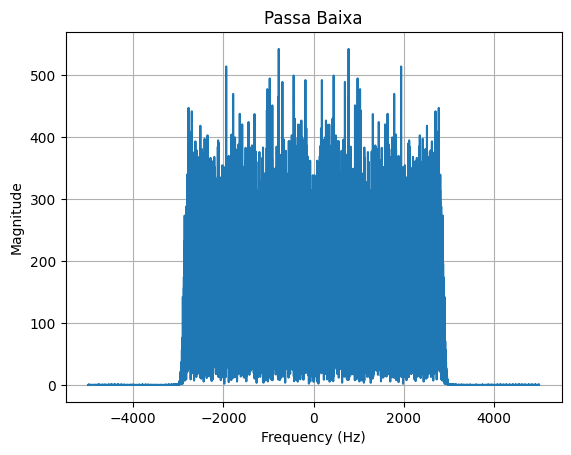

In [28]:
cutoff = 3000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_lb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [1, 0], fs=Fs)

sinal_filtrado_lb = signal.lfilter(taps_lb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_lb, Ts, "Passa Baixa")

## c
rejeite todas as frequências
entre $1.5 kHz$ e $2.5 kHz$

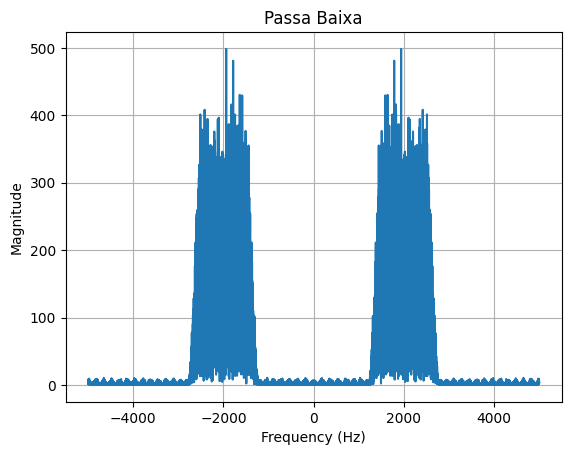

In [29]:
band = [1500, 2500]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass to stop, Hz
numtaps = 63         # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*Fs]

taps_bp = signal.remez(numtaps, edges, [0, 1, 0], fs=Fs)

sinal_filtrado_bp = signal.lfilter(taps_bp, 1, sinal_ruidoso)

plotspec(sinal_filtrado_bp, Ts, "Passa Baixa")

## d
reprojete os três filtros anteriores considerando que a frequência
de amostragem foi alterada para $Fs = 20 kHz$

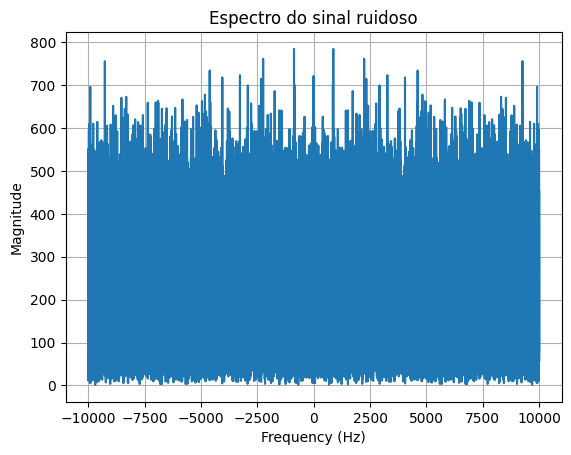

In [34]:
# Parâmetros
time = 3  # Duração do sinal
Fs = 20000 # Frequencia de amostragem (Hz)
Ts = 1 / Fs  # Intervalo de amostragem
N = int(time / Ts)  # Número de amostras
sinal_ruidoso = np.random.randn(N)  # Gera o sinal de ruído branco


plotspec(sinal_ruidoso, Ts, "Espectro do sinal ruidoso")

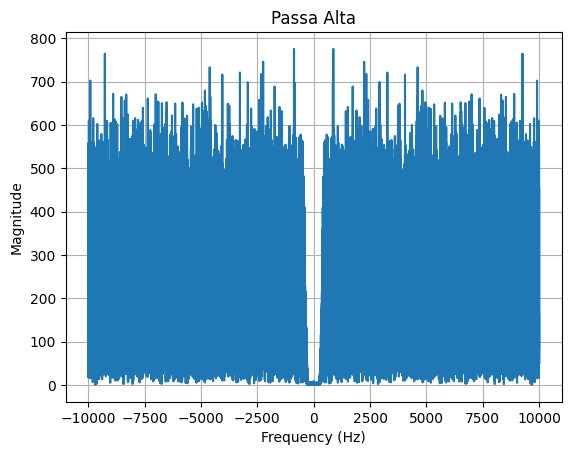

In [35]:
cutoff = 500.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_hb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [0, 1], fs=Fs)

sinal_filtrado_hb = signal.lfilter(taps_hb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_hb, Ts, "Passa Alta")

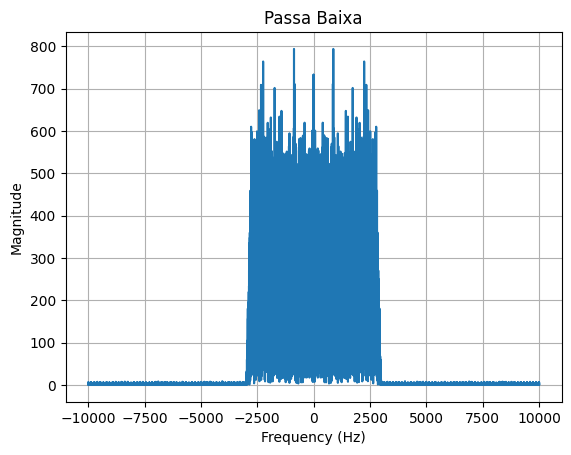

In [36]:
cutoff = 3000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_lb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [1, 0], fs=Fs)

sinal_filtrado_lb = signal.lfilter(taps_lb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_lb, Ts, "Passa Baixa")

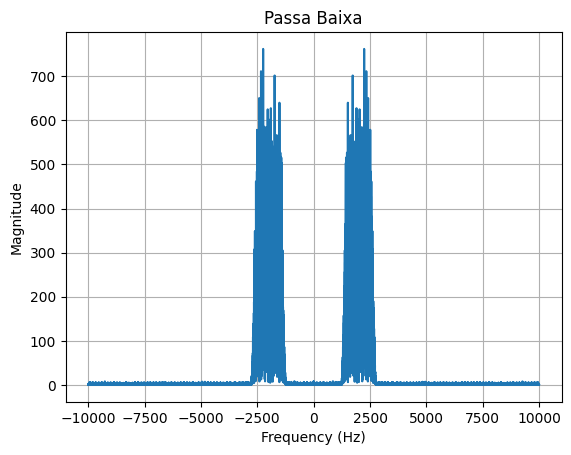

In [38]:
band = [1500, 2500]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass to stop, Hz
numtaps = 150         # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*Fs]

taps_bp = signal.remez(numtaps, edges, [0, 1, 0], fs=Fs)

sinal_filtrado_bp = signal.lfilter(taps_bp, 1, sinal_ruidoso)

plotspec(sinal_filtrado_bp, Ts, "Passa Baixa")